In [1]:
import numpy as np
import pandas as pd
from numpy import loadtxt

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense

In [59]:
file_loc = 'year_temp.xlsx'
data = pd.read_excel(file_loc, sheet_name='Sheet1', usecols="A,E")

df= pd.DataFrame(data, columns=['OCT-DEC'])
print(df)



     OCT-DEC
0      21.92
1      22.92
2      23.92
3      24.92
4      25.92
..       ...
112   133.92
113   134.92
114   135.92
115   136.92
116   137.92

[117 rows x 1 columns]


In [60]:
df1 = df.loc[1:117,'OCT-DEC']
print(df1)

1       22.92
2       23.92
3       24.92
4       25.92
5       26.92
        ...  
112    133.92
113    134.92
114    135.92
115    136.92
116    137.92
Name: OCT-DEC, Length: 116, dtype: float64


In [61]:
def prepare_data(time_data, n_features):
    X,y=[],[]
    #print(len(timeseries_data))
    for i in range(len(time_data)):
        end_ix=i+n_features
        
        if(end_ix > (len(time_data)-1)):
            break
            
        seq_x,seq_y = time_data[i:end_ix], time_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
            
    return np.array(X), np.array(y)

In [62]:
time_data = df1.values.tolist()
n_features = 4
X,y = prepare_data(time_data, n_features)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 20)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(78, 4) (78,)
(34, 4) (34,)


In [45]:
kerasmodel = Sequential()

kerasmodel.add(Dense(2, input_dim=4, activation='relu'))

kerasmodel.add(Dense(1))
kerasmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [46]:
kerasmodel.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])

In [47]:
history=kerasmodel.fit(X_train,y_train,validation_split=0.3, epochs=100, batch_size=10, callbacks=[EarlyStopping(patience=5)])

Epoch 1/100
6/6 [==============================] - 0s 32ms/step - loss: 15110.7981 - mse: 15110.7981 - mae: 114.9824 - val_loss: 17788.5215 - val_mse: 17788.5215 - val_mae: 121.8203
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 13969.8587 - mse: 13969.8583 - mae: 109.9464 - val_loss: 16842.0996 - val_mse: 16842.0996 - val_mae: 118.5375
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 13361.1674 - mse: 13361.1678 - mae: 108.0893 - val_loss: 15925.5088 - val_mse: 15925.5078 - val_mae: 115.2689
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 13720.3058 - mse: 13720.3058 - mae: 109.5511 - val_loss: 15038.5391 - val_mse: 15038.5391 - val_mae: 112.0151
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 11912.0075 - mse: 11912.0075 - mae: 101.6765 - val_loss: 14202.0654 - val_mse: 14202.0654 - val_mae: 108.8574
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 11136.8231 - mse: 11136

6/6 [==============================] - 0s 8ms/step - loss: 727.0269 - mse: 727.0269 - mae: 25.4407 - val_loss: 757.0261 - val_mse: 757.0261 - val_mae: 25.4260
Epoch 48/100
6/6 [==============================] - 0s 7ms/step - loss: 665.6967 - mse: 665.6967 - mae: 24.3810 - val_loss: 697.5493 - val_mse: 697.5493 - val_mae: 24.4182
Epoch 49/100
6/6 [==============================] - 0s 9ms/step - loss: 595.4200 - mse: 595.4200 - mae: 23.0053 - val_loss: 641.0056 - val_mse: 641.0056 - val_mae: 23.4194
Epoch 50/100
6/6 [==============================] - 0s 9ms/step - loss: 538.6952 - mse: 538.6952 - mae: 21.8870 - val_loss: 587.4435 - val_mse: 587.4436 - val_mae: 22.4318
Epoch 51/100
6/6 [==============================] - 0s 10ms/step - loss: 480.3786 - mse: 480.3786 - mae: 20.7943 - val_loss: 537.5569 - val_mse: 537.5569 - val_mae: 21.4705
Epoch 52/100
6/6 [==============================] - 0s 10ms/step - loss: 466.1422 - mse: 466.1422 - mae: 20.5606 - val_loss: 490.3788 - val_mse: 490.378

Epoch 96/100
6/6 [==============================] - 0s 12ms/step - loss: 1.3171 - mse: 1.3171 - mae: 1.1125 - val_loss: 1.1954 - val_mse: 1.1954 - val_mae: 1.0306
Epoch 97/100
6/6 [==============================] - 0s 10ms/step - loss: 1.1125 - mse: 1.1125 - mae: 1.0129 - val_loss: 1.0668 - val_mse: 1.0668 - val_mae: 0.9523
Epoch 98/100
6/6 [==============================] - 0s 9ms/step - loss: 1.1794 - mse: 1.1794 - mae: 1.0303 - val_loss: 0.9623 - val_mse: 0.9623 - val_mae: 0.8808
Epoch 99/100
6/6 [==============================] - 0s 9ms/step - loss: 0.9946 - mse: 0.9946 - mae: 0.9226 - val_loss: 0.8770 - val_mse: 0.8770 - val_mae: 0.8151
Epoch 100/100
6/6 [==============================] - 0s 10ms/step - loss: 0.7515 - mse: 0.7515 - mae: 0.7871 - val_loss: 0.8075 - val_mse: 0.8075 - val_mae: 0.7545


In [48]:
#accuracy = kerasmodel.evaluate(X_train,y_train)
#print('Train Accuracy:',(accuracy*100))

In [49]:
predictions = kerasmodel.predict(X_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(predictions.shape)

(78, 4)
(34, 4)
(78,)
(34,)
(34, 1)


In [50]:
def loss_plot(history):
    plt.figure(figsize=(16, 9))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss plot')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Train Root Mean Squared Error(RMSE): 0.89; Train Mean Absolute Error(MAE) : 0.78 
Test Root Mean Squared Error(RMSE): 0.92; Test Mean Absolute Error(MAE) : 0.81 


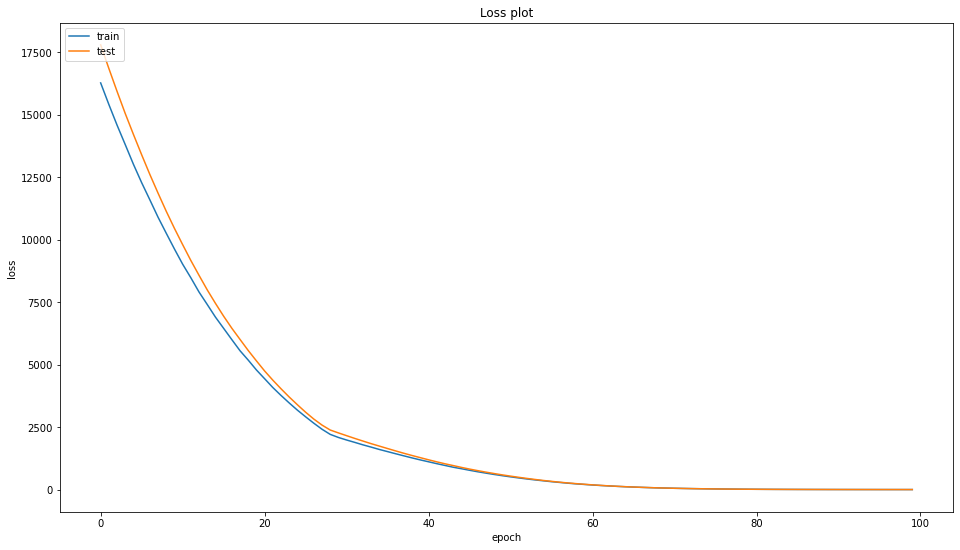

In [51]:
train_score = kerasmodel.evaluate(X_train, y_train, verbose=0)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(train_score[1]), train_score[2]))
test_score = kerasmodel.evaluate(X_test, y_test, verbose=0)
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(test_score[1]), test_score[2]))
loss_plot(history)

In [52]:
def prediction_plot(testY, test_predict):
    len_prediction=[x for x in range(len(testY))]
    plt.figure(figsize=(16,5))
    plt.title('Actual temperature values vs Predicted temperature values')
    plt.plot(len_prediction, testY[:len(testY)], marker='.', label="actual")
    plt.plot(len_prediction, test_predict[:len(test_predict)],'r', marker='.', label="prediction")
    #plt.tight_layout()
    sns.despine(top=True)
    plt.subplots_adjust(left=0.07)
    plt.ylabel('Temperature (°C)', size=15)
    plt.xlabel('Time (year)', size=15)
    plt.legend(fontsize=15)
    plt.show();

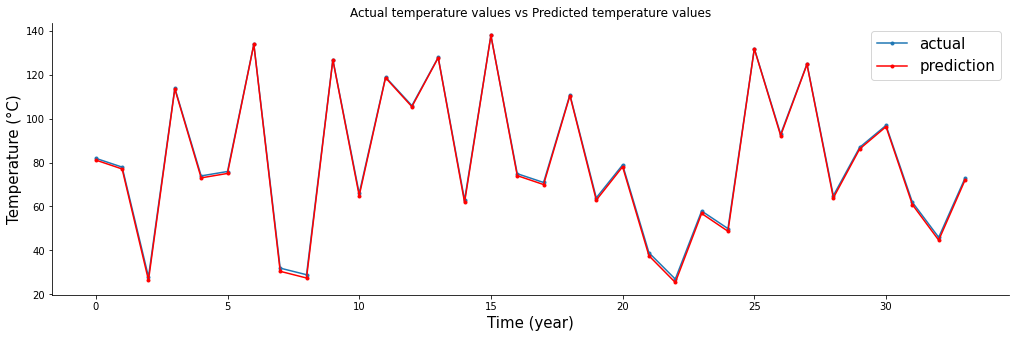

In [53]:
prediction_plot(y_test, predictions)

Text(0, 0.5, 'Predictions')

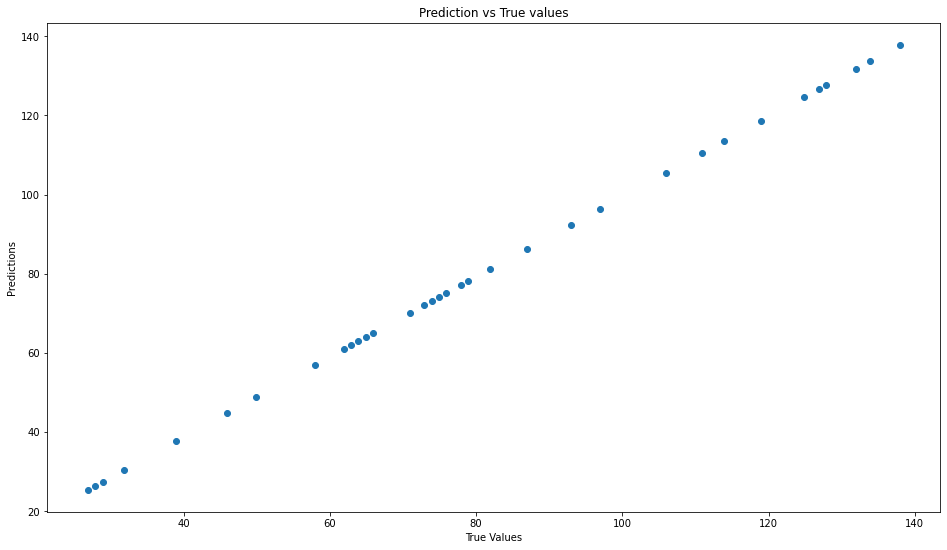

In [54]:
plt.figure(figsize=(16, 9))
plt.title('Prediction vs True values')
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [58]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(predictions, y_test)
print("Mean square error: ", error)

Mean square error:  0.8448842755501476
